In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from vmdpy import VMD
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D,Input, UpSampling2D
from keras import Model
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [13]:
def VMD_plot(plot,K=3, signal_name='norm', tau=0,alpha=2000, DC=0, init=1, tol=1e-7):
    signal = data[signal_name]
    (imf,imf_hat,omega)=VMD(signal, alpha, tau, K, DC, init, tol)
    if plot==1 or plot==3:
        # 展示原信号和各IMF
        fig,axes = plt.subplots(nrows=K+1, ncols=1, figsize=(10,8))
        axes[0].plot(signal)
        axes[0].set_ylabel(signal_name)
        for i in range(K):
            axes[i+1].plot(imf[i])
        plt.tight_layout()
    if plot==2 or plot==3:
        # 展示中心频率的迭代情况
        plt.figure()
        for i in range(len(omega[0])):
            plt.plot(omega[:,i],np.arange(len(omega)))
            plt.scatter(omega[-1,i],len(omega))
            plt.gca().invert_yaxis()
        print(omega[-1])
    return imf,imf_hat,omega

def watch(name,k=3):
    imf,imf_hat,omega = VMD_plot(3,K=k,signal_name=name)
    imf = imf.tolist()
    imf.append(data[name])
    imf = np.array(imf,dtype=object)
    imf.shape

In [4]:
columns = ['norm','T2','T3','T4','T5']
data = pd.DataFrame(columns = columns)
for i in [1,2,3,4,5]:
    path = 'E:\\2022_8_AbsignalRecog_VDM\\data\\T'+str(i)+'.csv'
    data[columns[i-1]] = pd.read_csv(path)

    
data.loc[2047] = data.loc[2046]
data

,norm,T2,T3,T4,T5
0,-0.0000,-0.0000,-0.0000,-0.0000,-0.0
1,-0.0000,-0.0000,-0.0000,-0.0000,-0.0
2,-0.0000,1.6854,-0.0000,-0.0000,-0.0
3,-0.0000,-6.7416,-0.0000,-0.0000,-0.0
4,-1.9048,2.2472,-0.0000,-0.0000,-0.0
...,...,...,...,...,...
2043,-4.7619,1.1236,2.6087,1.6484,-0.0
2044,-4.7619,0.5618,2.6087,1.6484,-0.0
2045,-4.7619,0.5618,2.6087,1.6484,-0.0
2046,-4.7619,0.5618,2.6087,1.6484,-0.0


[1.23931863e-04 1.77568954e-01 4.93109773e-01]


(4, 2048)

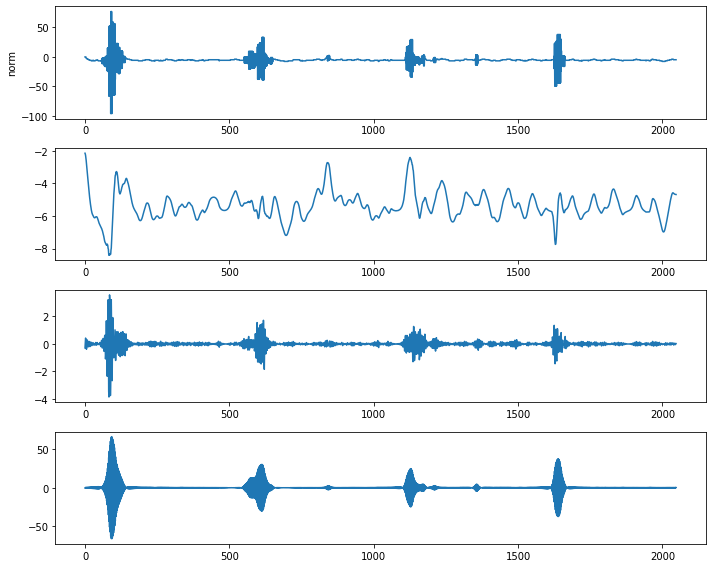

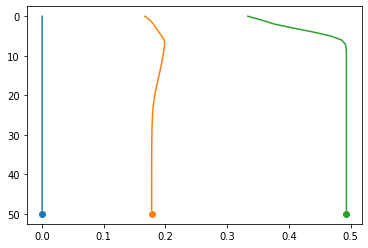

In [7]:
imf1,imf_hat1,omega1 = VMD_plot(3,signal_name='norm')
imf1 = imf1.tolist()
imf1.append(data['norm'])
imf1 = np.array(imf1,dtype=object)
imf1.shape

[0.0063861  0.23592921 0.49390392]


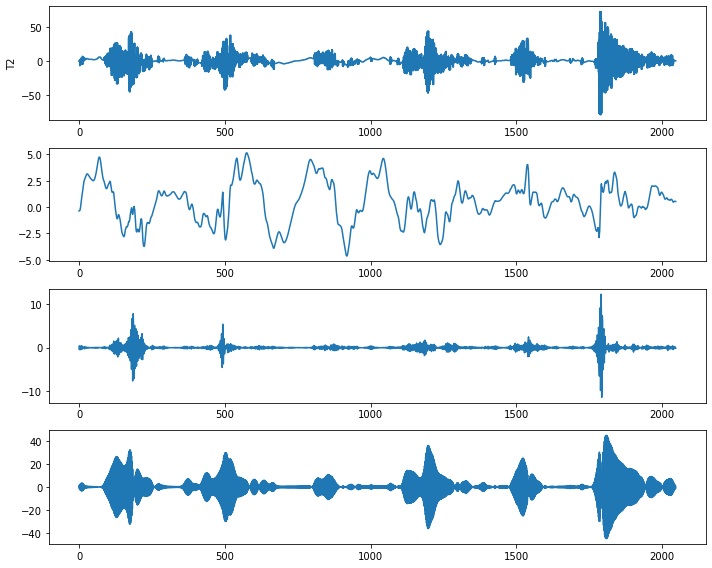

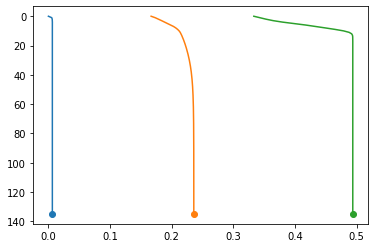

In [14]:
watch('T2')

[0.00522748 0.06519374 0.49499182]


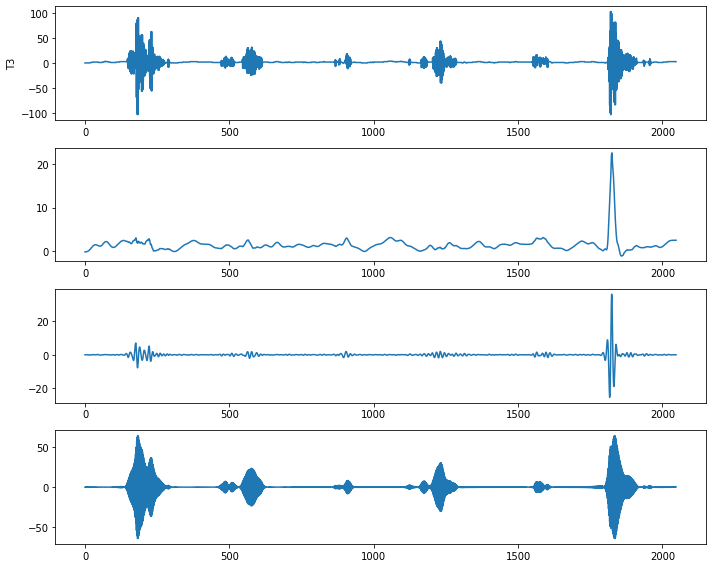

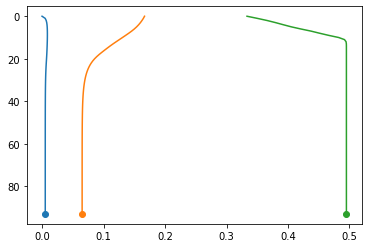

In [10]:
watch('T3')

[0.00195091 0.196949   0.49009137]


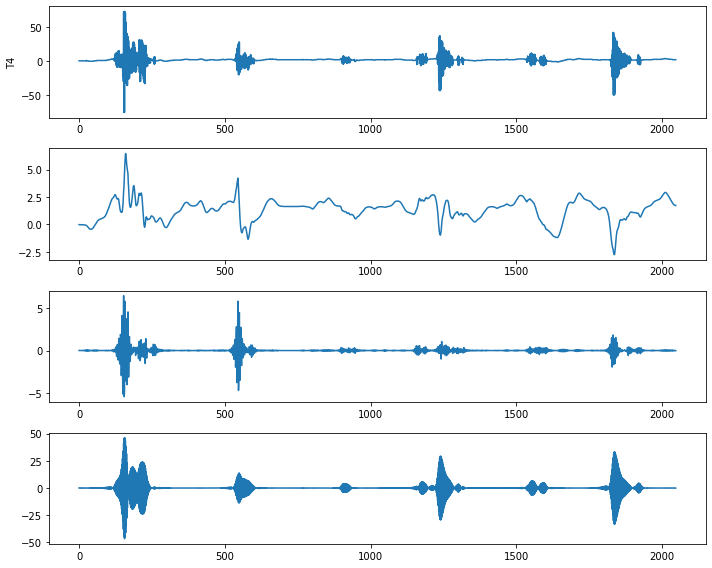

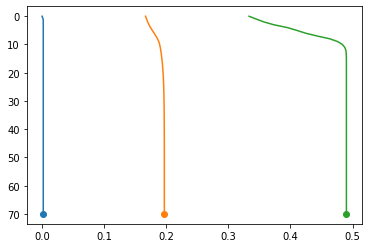

In [11]:
watch('T4')

[0.00388965 0.15871843 0.4937018 ]


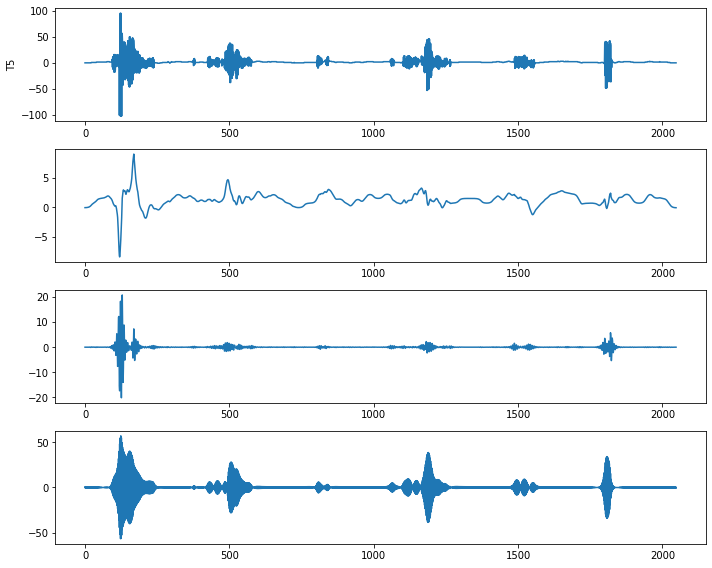

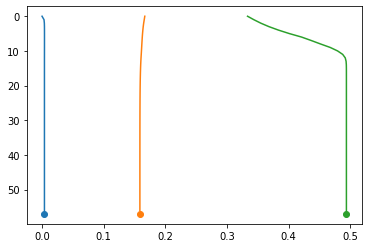

In [12]:
watch('T5')

通过尝试K=3的时候，除了T3，各IMF中心频率分布还是比较平均的。如果K继续增大：

[1.23612475e-04 1.76653668e-01 4.80307893e-01 4.95422097e-01]


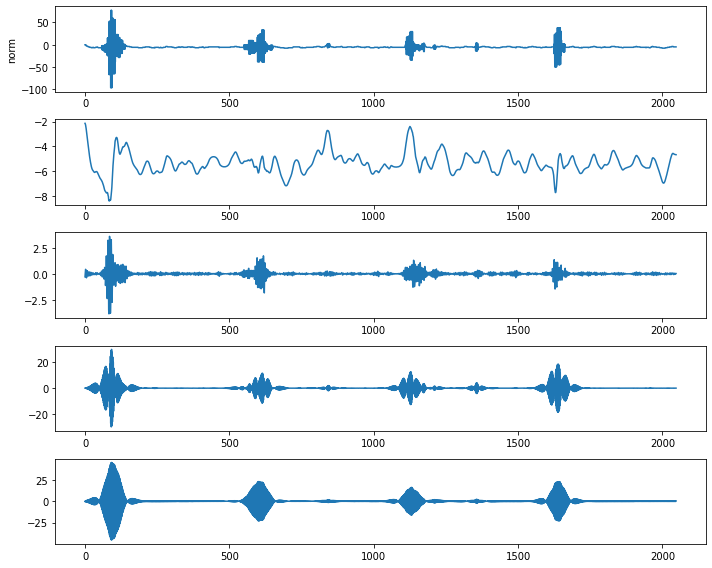

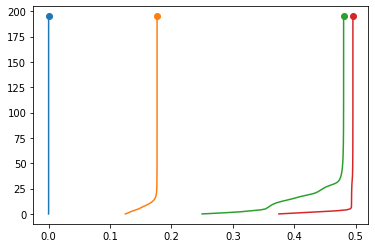

In [21]:
watch('norm',k=4)

[4.57321830e-05 2.61399872e-02 1.77862865e-01 4.80315699e-01
 4.95423232e-01]


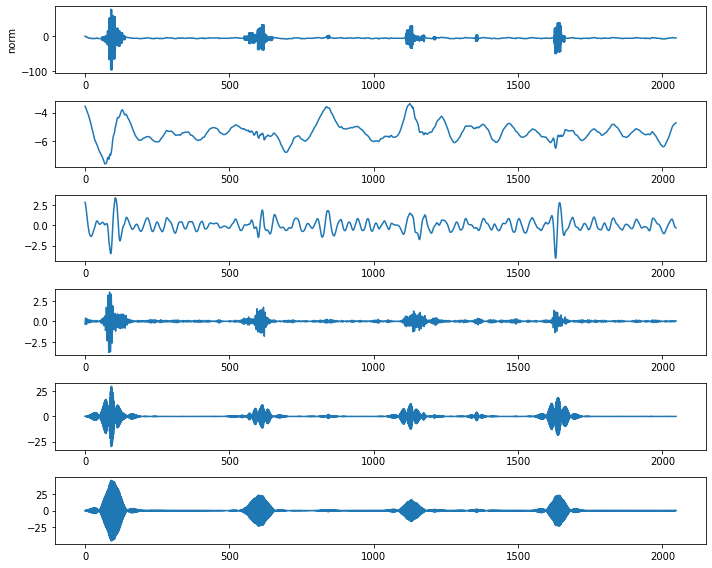

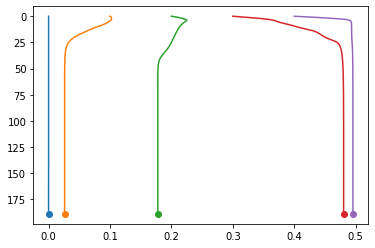

In [22]:
watch('norm',k=5)

因此，选择 K=3 比较合适